## Ranking Analysis

## To-dos: Carlotta
- die think tank namen sind nicht die sauberen. Bitte schauen wo wir die gespeichert hatten

Bisher war df_regions das Test-Dataframe
- Analyse-Schritte für andere think-tanks ebenfalls durchführen
- Kategorien finden die über min. 5 Jahre ein stablies Ranking (ü. 75 think-tanks pro Jahr) enthalten

In [141]:
##import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [142]:
def get_list_element(val):
    #print(type(val))
    if isinstance(val, list):
        return int(val[0])
    else:
        return int(val)

In [143]:
#file_path
file_path = '../results/tts_conslidated_categories.xlsx'

In [144]:
#import datasets
df_regions = pd.read_excel(file_path,sheet_name='regions',index=False)
df_research = pd.read_excel(file_path,sheet_name='research_areas',index=False)
df_special = pd.read_excel(file_path,sheet_name='special',index=False)

In [145]:
df_regions.head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
0,1,brookings institution (united states),Top 30 Think Tanks United States,2008,United States,['(united states)'],brookings institution,Top Think Tanks in the United States
1,2,council on foreign relations,Top 30 Think Tanks United States,2008,United States,[],council on foreign relations,Top Think Tanks in the United States
2,3,carnegie endowment for international peace,Top 30 Think Tanks United States,2008,United States,[],carnegie endowment for international peace,Top Think Tanks in the United States
3,4,rand corporation,Top 30 Think Tanks United States,2008,United States,[],rand corporation,Top Think Tanks in the United States
4,5,heritage foundation,Top 30 Think Tanks United States,2008,United States,[],heritage foundation,Top Think Tanks in the United States


## Analyse: 

In [146]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_regions = pd.pivot_table(df_regions, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [147]:
table_regions

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Top 25 Think Tanks in Eastern Europe,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Latin America and the Caribbean,30.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in North America (Non-US),24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including Sub-Saharan Africa),26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including sub-Saharan Africa),NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Top 40 Think Tanks in Asia (Excluding China, India, Japan, and the Republic of Korea)",NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN
Top 40 Think Tanks in Latin America and the Caribbean,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 45 Think Tanks in South and Central America,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tank in the World,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [148]:
table_regions.loc['Top Think Tanks Worldwide (US and non-US) ']

Year
2008      NaN
2009     25.0
2010     25.0
2011     30.0
2012    150.0
2013    150.0
2014    150.0
2015    172.0
2016    173.0
2017    172.0
2018    175.0
Name: Top Think Tanks Worldwide (US and non-US) , dtype: float64

In [149]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_worldwide = df_regions[df_regions['cleaned_category']=='Top Think Tanks Worldwide (US and non-US) ']

In [150]:
list_worldwide = []
for year, df_year in test_worldwide.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_worldwide.append(df_year)

In [151]:
#you can access each dataframe by indexing the list:
list_worldwide[0].head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
2009,,,,,,,,
299,1,brookings institution (united states),Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US)
300,2,council on foreign relations us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],council on foreign relations,Top Think Tanks Worldwide (US and non-US)
301,3,carnegie endowment for international peace us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US)
302,4,rand corporation us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],rand corporation,Top Think Tanks Worldwide (US and non-US)
303,5,cato institute us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],cato institute,Top Think Tanks Worldwide (US and non-US)


In [152]:
#drop years with too little values and set them to equal length of 150:
final_list = []
for l in list_worldwide:
    if len(l)>149.0:
        l = l.head(150).reset_index()
        final_list.append(l)
        
len(final_list)

7

In [153]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs = []
for f in final_list:
    dz_df = np.array_split(f, 10)
    dz_list = []
    for idx,group in enumerate(dz_df):
        group['dezil'] = idx+1
        dz_list.append(group)
    dz_all = pd.concat(dz_list)
    list_dz_dfs.append(dz_all)

In [154]:
list_dz_dfs[1].head()

,2013,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category,dezil
0,2440,1,brookings institution (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US),1
1,2441,2,chatham house (united kingdom),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united kingdom)'],chatham,Top Think Tanks Worldwide (US and non-US),1
2,2442,3,carnegie endowment for international peace (un...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US),1
3,2443,4,center for strategic and international studies...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],center for strategic and international studies,Top Think Tanks Worldwide (US and non-US),1
4,2444,5,stockholm international peace research institu...,Top Think Tanks Worldwide (US and non-US),2013,Sweden,"['(sipri)', '(sweden)']",stockholm international peace research institute,Top Think Tanks Worldwide (US and non-US),1


## 2: overview of datasets:

In [155]:
#how many think-tanks in total in this category?
top_ww_all = pd.concat(list_dz_dfs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [157]:
#this is the number of think-tanks that have been listed over 7 years within the ranking:
len(top_ww_all['clean_tt'].value_counts())

204

In [159]:
top_ww_all.groupby(['clean_tt','Year'])

table_top_ww_all = pd.pivot_table(top_ww_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [160]:
table_top_ww_all

Year,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,
adam smith institute,NaN,NaN,NaN,[9],[9],[9],[9]
african centre for technology studies,[7],NaN,NaN,NaN,NaN,NaN,NaN
african centre for the constructive resolution of disputes,[5],[5],[5],[5],[5],[3],[3]
african economic research consortium,[5],[5],[5],[5],[5],[5],[5]
african technology policy studies network,[7],[7],[7],[7],[7],[7],[7]
al-ahram center for political and strategic studies,[4],[4],[4],[4],[4],[4],[4]
american enterprise institute for public policy research,[2],[2],[2],[2],[2],[3],[3]
amnesty international,[1],[1],[1],[1],[2],[3],[3]
asia society policy institute,NaN,NaN,NaN,[10],[9],[8],[8]


In [118]:
#table_top_ww_all[table_top_ww_all['Year']==2008]

In [161]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years = top_ww_all.groupby('dezil')['clean_tt'].nunique()

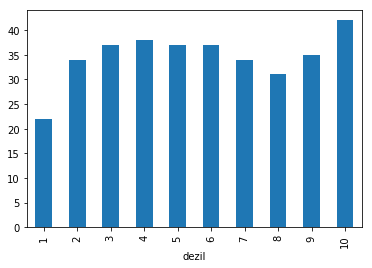

In [164]:
dz_years.plot.bar(x='dezil', y='unique think tanks (2012-18)')
#dz_years.plot(color='orange')

In [121]:
dz_years

dezil
1     29
2     45
3     42
4     49
5     44
6     47
7     49
8     43
9     50
10    54
Name: Think Tank, dtype: int64

In [166]:
sanky = table_top_ww_all[[2012,2018]]
sanky = sanky.fillna(0)

sanky[2012] = sanky[2012].apply(get_list_element)
sanky[2018] = sanky[2018].apply(get_list_element)
sanky['value'] = 1

In [168]:
sanky_export = sanky.groupby([2012,2018]).size().reset_index().rename(columns={0:'count'})
sanky_export

,2012,2018,count
0,0,0,13
1,0,1,1
2,0,2,3
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,3
7,0,7,4
8,0,8,7
9,0,9,5


In [169]:
sanky_export.reset_index().to_csv('../results/sanky_test.csv',index_label=False,index=False)

 Auf dieser Seite kann man Sanky Diagrams erstellen: 
 https://chart-studio.plot.ly